# **App Rating Predictor**

 Build a machine learning model to predict the rating of an app based on its features.
- Refer this Dataset: https://www.kaggle.com/datasets/lava18/google-play-store-apps

# Exploratory data analysis

In [1]:
import pandas as pd
import numpy as np

In [2]:
!pip install  opendatasets --upgrade --quiet

In [3]:
import os
import shutil

In [4]:
import opendatasets as od

In [5]:
dataset_url='https://www.kaggle.com/datasets/lava18/google-play-store-apps'

In [6]:
od.download(dataset_url)

100%|██████████| 1.94M/1.94M [00:00<00:00, 105MB/s]

In [7]:
import os

In [8]:
data_dir='/content/google-play-store-apps'

In [9]:
os.listdir(data_dir)

['googleplaystore_user_reviews.csv', 'googleplaystore.csv', 'license.txt']

In [10]:
df=pd.read_csv('/content/google-play-store-apps/googleplaystore.csv')

In [11]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [12]:
print(df.shape)
print(df.columns)

(10841, 13)
Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [13]:
print(df['Category'].unique(),'\n')
print(df['Type'].unique(),'\n')
print(df['Genres'].unique(),'\n')
print(df['Android Ver'].unique(),'\n')
print(df['App'].unique(),'\n')
print(df['Rating'].unique(),'\n')
print(df['Reviews'].unique(),'\n')
print(df['Size'].unique(),'\n')
print(df['Installs'].unique(),'\n')
print(df['Price'].unique(),'\n')
print(df['Content Rating'].unique(),'\n')
print(df['Last Updated'].unique(),'\n')
print(df['Current Ver'].unique(),'\n')


['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9'] 

['Free' 'Paid' nan '0'] 

['Art & Design' 'Art & Design;Pretend Play' 'Art & Design;Creativity'
 'Art & Design;Action & Adventure' 'Auto & Vehicles' 'Beauty'
 'Books & Reference' 'Business' 'Comics' 'Comics;Creativity'
 'Communication' 'Dating' 'Education;Education' 'Education'
 'Education;Creativity' 'Education;Music & Video'
 'Education;Action & Adventure' 'Education;Pretend Play'
 'Education;Brain Games' 'Entertainment' 'Entertainment;Music & Video'
 'Entertainment;Brain Games' 'Entertainment;Creativity' 'Events' 'Fin

dataset contains nan values and string values where numerical values needs to be present and columns contains special symbols which needs to be removed
basical data needs to be prepared for machine to understand it

In [14]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [15]:
#fill missing data using mean values of the column
df['Rating'] = df['Rating'].fillna(df['Rating'].median())
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

 current version and android version could be anomalies so removing them is more logical as no of examples are low too

In [16]:
df['Android Ver'][15]

'4.2 and up'

In [17]:
df = df.dropna()
df.isnull().sum()# a complete dataset

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [19]:
print("shape of dataset",df.shape)#(10841, 13) values we had

shape of dataset (10829, 13)


In [20]:
print(df['Category'].unique(),'\n')
print(df['Type'].unique(),'\n')
print(df['Genres'].unique(),'\n')
print(df['Android Ver'].unique(),'\n')
print(df['App'].unique(),'\n')
print(df['Rating'].unique(),'\n')
print(df['Reviews'].unique(),'\n')
print(df['Size'].unique(),'\n')
print(df['Installs'].unique(),'\n')
print(df['Price'].unique(),'\n')
print(df['Content Rating'].unique(),'\n')
print(df['Last Updated'].unique(),'\n')
print(df['Current Ver'].unique(),'\n')

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION'] 

['Free' 'Paid'] 

['Art & Design' 'Art & Design;Pretend Play' 'Art & Design;Creativity'
 'Art & Design;Action & Adventure' 'Auto & Vehicles' 'Beauty'
 'Books & Reference' 'Business' 'Comics' 'Comics;Creativity'
 'Communication' 'Dating' 'Education;Education' 'Education'
 'Education;Creativity' 'Education;Music & Video'
 'Education;Action & Adventure' 'Education;Pretend Play'
 'Education;Brain Games' 'Entertainment' 'Entertainment;Music & Video'
 'Entertainment;Brain Games' 'Entertainment;Creativity' 'Events' 'Finance'
 'Food &

Convert categorical data into what machine can understand ie numbers

In [21]:
from sklearn import preprocessing

In [22]:
df['App']

0           Photo Editor & Candy Camera & Grid & ScrapBook
1                                      Coloring book moana
2        U Launcher Lite – FREE Live Cool Themes, Hide ...
3                                    Sketch - Draw & Paint
4                    Pixel Draw - Number Art Coloring Book
                               ...                        
10836                                     Sya9a Maroc - FR
10837                     Fr. Mike Schmitz Audio Teachings
10838                               Parkinson Exercices FR
10839                        The SCP Foundation DB fr nn5n
10840        iHoroscope - 2018 Daily Horoscope & Astrology
Name: App, Length: 10829, dtype: object

In [23]:
# App values encoding
encoder = preprocessing.LabelEncoder()
df['App'] = encoder.fit_transform(df['App'])
# This encoder converts the values into numeric values

In [24]:
df['App']

0        6955
1        2630
2        8648
3        7819
4        7014
         ... 
10836    8165
10837    4605
10838    6884
10839    8386
10840    9475
Name: App, Length: 10829, dtype: int64

In [25]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,6955,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,2630,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,8648,ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,7819,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,7014,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,8165,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,4605,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,6884,MEDICAL,4.3,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,8386,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


One hot encoding

In [26]:
df= pd.concat([df, pd.get_dummies(df['Category'], prefix='new_')], axis=1)

In [27]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'new__ART_AND_DESIGN', 'new__AUTO_AND_VEHICLES',
       'new__BEAUTY', 'new__BOOKS_AND_REFERENCE', 'new__BUSINESS',
       'new__COMICS', 'new__COMMUNICATION', 'new__DATING', 'new__EDUCATION',
       'new__ENTERTAINMENT', 'new__EVENTS', 'new__FAMILY', 'new__FINANCE',
       'new__FOOD_AND_DRINK', 'new__GAME', 'new__HEALTH_AND_FITNESS',
       'new__HOUSE_AND_HOME', 'new__LIBRARIES_AND_DEMO', 'new__LIFESTYLE',
       'new__MAPS_AND_NAVIGATION', 'new__MEDICAL', 'new__NEWS_AND_MAGAZINES',
       'new__PARENTING', 'new__PERSONALIZATION', 'new__PHOTOGRAPHY',
       'new__PRODUCTIVITY', 'new__SHOPPING', 'new__SOCIAL', 'new__SPORTS',
       'new__TOOLS', 'new__TRAVEL_AND_LOCAL', 'new__VIDEO_PLAYERS',
       'new__WEATHER'],
      dtype='object')

In [28]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,new__PERSONALIZATION,new__PHOTOGRAPHY,new__PRODUCTIVITY,new__SHOPPING,new__SOCIAL,new__SPORTS,new__TOOLS,new__TRAVEL_AND_LOCAL,new__VIDEO_PLAYERS,new__WEATHER
0,6955,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,...,0,0,0,0,0,0,0,0,0,0
1,2630,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,...,0,0,0,0,0,0,0,0,0,0
2,8648,ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,...,0,0,0,0,0,0,0,0,0,0
3,7819,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,...,0,0,0,0,0,0,0,0,0,0
4,7014,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,8165,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,...,0,0,0,0,0,0,0,0,0,0
10837,4605,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,...,0,0,0,0,0,0,0,0,0,0
10838,6884,MEDICAL,4.3,3,9.5M,"1,000+",Free,0,Everyone,Medical,...,0,0,0,0,0,0,0,0,0,0
10839,8386,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,...,0,0,0,0,0,0,0,0,0,0


In [29]:
df=df.drop('Category', axis=1)# we dont need this anymore

In [30]:
df

,App,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,...,new__PERSONALIZATION,new__PHOTOGRAPHY,new__PRODUCTIVITY,new__SHOPPING,new__SOCIAL,new__SPORTS,new__TOOLS,new__TRAVEL_AND_LOCAL,new__VIDEO_PLAYERS,new__WEATHER
0,6955,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",...,0,0,0,0,0,0,0,0,0,0
1,2630,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",...,0,0,0,0,0,0,0,0,0,0
2,8648,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",...,0,0,0,0,0,0,0,0,0,0
3,7819,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",...,0,0,0,0,0,0,0,0,0,0
4,7014,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,8165,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",...,0,0,0,0,0,0,0,0,0,0
10837,4605,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",...,0,0,0,0,0,0,0,0,0,0
10838,6884,4.3,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",...,0,0,0,0,0,0,0,0,0,0
10839,8386,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",...,0,0,0,0,0,0,0,0,0,0


In [31]:
#straightforard encoding of these two columns
df['Genres'] = encoder.fit_transform(df['Genres'])
df['Content Rating'] = encoder.fit_transform(df['Content Rating'])

In [32]:
#one hot encoding for type feature
df= pd.concat([df, pd.get_dummies(df['Type'], prefix='new_')], axis=1)
df=df.drop('Type', axis=1)

In [33]:
df

,App,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,...,new__PRODUCTIVITY,new__SHOPPING,new__SOCIAL,new__SPORTS,new__TOOLS,new__TRAVEL_AND_LOCAL,new__VIDEO_PLAYERS,new__WEATHER,new__Free,new__Paid
0,6955,4.1,159,19M,"10,000+",0,1,9,"January 7, 2018",1.0.0,...,0,0,0,0,0,0,0,0,1,0
1,2630,3.9,967,14M,"500,000+",0,1,12,"January 15, 2018",2.0.0,...,0,0,0,0,0,0,0,0,1,0
2,8648,4.7,87510,8.7M,"5,000,000+",0,1,9,"August 1, 2018",1.2.4,...,0,0,0,0,0,0,0,0,1,0
3,7819,4.5,215644,25M,"50,000,000+",0,4,9,"June 8, 2018",Varies with device,...,0,0,0,0,0,0,0,0,1,0
4,7014,4.3,967,2.8M,"100,000+",0,1,11,"June 20, 2018",1.1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,8165,4.5,38,53M,"5,000+",0,1,39,"July 25, 2017",1.48,...,0,0,0,0,0,0,0,0,1,0
10837,4605,5.0,4,3.6M,100+,0,1,39,"July 6, 2018",1.0,...,0,0,0,0,0,0,0,0,1,0
10838,6884,4.3,3,9.5M,"1,000+",0,1,71,"January 20, 2017",1.0,...,0,0,0,0,0,0,0,0,1,0
10839,8386,4.5,114,Varies with device,"1,000+",0,3,19,"January 19, 2015",Varies with device,...,0,0,0,0,0,0,0,0,1,0


In [34]:
df.columns

Index(['App', 'Rating', 'Reviews', 'Size', 'Installs', 'Price',
       'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'new__ART_AND_DESIGN', 'new__AUTO_AND_VEHICLES',
       'new__BEAUTY', 'new__BOOKS_AND_REFERENCE', 'new__BUSINESS',
       'new__COMICS', 'new__COMMUNICATION', 'new__DATING', 'new__EDUCATION',
       'new__ENTERTAINMENT', 'new__EVENTS', 'new__FAMILY', 'new__FINANCE',
       'new__FOOD_AND_DRINK', 'new__GAME', 'new__HEALTH_AND_FITNESS',
       'new__HOUSE_AND_HOME', 'new__LIBRARIES_AND_DEMO', 'new__LIFESTYLE',
       'new__MAPS_AND_NAVIGATION', 'new__MEDICAL', 'new__NEWS_AND_MAGAZINES',
       'new__PARENTING', 'new__PERSONALIZATION', 'new__PHOTOGRAPHY',
       'new__PRODUCTIVITY', 'new__SHOPPING', 'new__SOCIAL', 'new__SPORTS',
       'new__TOOLS', 'new__TRAVEL_AND_LOCAL', 'new__VIDEO_PLAYERS',
       'new__WEATHER', 'new__Free', 'new__Paid'],
      dtype='object')

columns left to process are 'Size', 'Installs', 'Price','Last Updated', 'Current Ver','Android Ver'

In [35]:
print(df['Android Ver'].unique(),'\n')
#contains strings and three point numbers so restricting to first two numerical values ie for '4.0.3 and up'value will become 4.0
print(df['Size'].unique(),'\n')
# contains character like K(kilobytes), M(megabytes). For uniformity convert all of them into megabytes and remove the character M
print(df['Installs'].unique(),'\n')
#contains special character '+' , so need to remove that
print(df['Price'].unique(),'\n')
#contains special character '$' , so need to remove that
print(df['Last Updated'].unique(),'\n')
#contains strings and date format so need to convert it to a number
print(df['Current Ver'].unique(),'\n')
##contains three point or four point numbers so restricting to first two numerical values ie for '4.0.3 and up'value will become 4.0

['4.0.3 and up' '4.2 and up' '4.4 and up' '2.3 and up' '3.0 and up'
 '4.1 and up' '4.0 and up' '2.3.3 and up' 'Varies with device'
 '2.2 and up' '5.0 and up' '6.0 and up' '1.6 and up' '1.5 and up'
 '2.1 and up' '7.0 and up' '5.1 and up' '4.3 and up' '4.0.3 - 7.1.1'
 '2.0 and up' '3.2 and up' '4.4W and up' '7.1 and up' '7.0 - 7.1.1'
 '8.0 and up' '5.0 - 8.0' '3.1 and up' '2.0.1 and up' '4.1 - 7.1.1'
 '5.0 - 6.0' '1.0 and up' '2.2 - 7.1.1' '5.0 - 7.1.1'] 

['19M' '14M' '8.7M' '25M' '2.8M' '5.6M' '29M' '33M' '3.1M' '28M' '12M'
 '20M' '21M' '37M' '5.5M' '17M' '39M' '31M' '4.2M' '7.0M' '23M' '6.0M'
 '6.1M' '4.6M' '9.2M' '5.2M' '11M' '24M' 'Varies with device' '9.4M' '15M'
 '10M' '1.2M' '26M' '8.0M' '7.9M' '56M' '57M' '35M' '54M' '201k' '3.6M'
 '5.7M' '8.6M' '2.4M' '27M' '2.7M' '2.5M' '16M' '3.4M' '8.9M' '3.9M'
 '2.9M' '38M' '32M' '5.4M' '18M' '1.1M' '2.2M' '4.5M' '9.8M' '52M' '9.0M'
 '6.7M' '30M' '2.6M' '7.1M' '3.7M' '22M' '7.4M' '6.4M' '3.2M' '8.2M'
 '9.9M' '4.9M' '9.5M' '5.0M' '5.9M' '13M

**Deal with Android Version**

In [36]:
import re
#Deal with Android Version
def extract_major_version(version):
    # Extract major version number using regular expression
    pattern = r'^(\d+)(\.\d+)*'
    match = re.match(pattern, version)
    if match:
        major_version = match.group(1)
        return int(major_version)
    else:
        return None

# Apply the function
df['Android_Version_new'] = df['Android Ver'].apply(extract_major_version)
df

,App,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,...,new__SHOPPING,new__SOCIAL,new__SPORTS,new__TOOLS,new__TRAVEL_AND_LOCAL,new__VIDEO_PLAYERS,new__WEATHER,new__Free,new__Paid,Android_Version_new
0,6955,4.1,159,19M,"10,000+",0,1,9,"January 7, 2018",1.0.0,...,0,0,0,0,0,0,0,1,0,4.0
1,2630,3.9,967,14M,"500,000+",0,1,12,"January 15, 2018",2.0.0,...,0,0,0,0,0,0,0,1,0,4.0
2,8648,4.7,87510,8.7M,"5,000,000+",0,1,9,"August 1, 2018",1.2.4,...,0,0,0,0,0,0,0,1,0,4.0
3,7819,4.5,215644,25M,"50,000,000+",0,4,9,"June 8, 2018",Varies with device,...,0,0,0,0,0,0,0,1,0,4.0
4,7014,4.3,967,2.8M,"100,000+",0,1,11,"June 20, 2018",1.1,...,0,0,0,0,0,0,0,1,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,8165,4.5,38,53M,"5,000+",0,1,39,"July 25, 2017",1.48,...,0,0,0,0,0,0,0,1,0,4.0
10837,4605,5.0,4,3.6M,100+,0,1,39,"July 6, 2018",1.0,...,0,0,0,0,0,0,0,1,0,4.0
10838,6884,4.3,3,9.5M,"1,000+",0,1,71,"January 20, 2017",1.0,...,0,0,0,0,0,0,0,1,0,2.0
10839,8386,4.5,114,Varies with device,"1,000+",0,3,19,"January 19, 2015",Varies with device,...,0,0,0,0,0,0,0,1,0,NaN


In [37]:
df.columns

Index(['App', 'Rating', 'Reviews', 'Size', 'Installs', 'Price',
       'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'new__ART_AND_DESIGN', 'new__AUTO_AND_VEHICLES',
       'new__BEAUTY', 'new__BOOKS_AND_REFERENCE', 'new__BUSINESS',
       'new__COMICS', 'new__COMMUNICATION', 'new__DATING', 'new__EDUCATION',
       'new__ENTERTAINMENT', 'new__EVENTS', 'new__FAMILY', 'new__FINANCE',
       'new__FOOD_AND_DRINK', 'new__GAME', 'new__HEALTH_AND_FITNESS',
       'new__HOUSE_AND_HOME', 'new__LIBRARIES_AND_DEMO', 'new__LIFESTYLE',
       'new__MAPS_AND_NAVIGATION', 'new__MEDICAL', 'new__NEWS_AND_MAGAZINES',
       'new__PARENTING', 'new__PERSONALIZATION', 'new__PHOTOGRAPHY',
       'new__PRODUCTIVITY', 'new__SHOPPING', 'new__SOCIAL', 'new__SPORTS',
       'new__TOOLS', 'new__TRAVEL_AND_LOCAL', 'new__VIDEO_PLAYERS',
       'new__WEATHER', 'new__Free', 'new__Paid', 'Android_Version_new'],
      dtype='object')

In [38]:
df.isnull().sum()

App                            0
Rating                         0
Reviews                        0
Size                           0
Installs                       0
Price                          0
Content Rating                 0
Genres                         0
Last Updated                   0
Current Ver                    0
Android Ver                    0
new__ART_AND_DESIGN            0
new__AUTO_AND_VEHICLES         0
new__BEAUTY                    0
new__BOOKS_AND_REFERENCE       0
new__BUSINESS                  0
new__COMICS                    0
new__COMMUNICATION             0
new__DATING                    0
new__EDUCATION                 0
new__ENTERTAINMENT             0
new__EVENTS                    0
new__FAMILY                    0
new__FINANCE                   0
new__FOOD_AND_DRINK            0
new__GAME                      0
new__HEALTH_AND_FITNESS        0
new__HOUSE_AND_HOME            0
new__LIBRARIES_AND_DEMO        0
new__LIFESTYLE                 0
new__MAPS_

In [39]:
count = 0
for index, row in df.iterrows():
    try:
        if row['Android Ver'] == 'Varies with device':
            count += 1
    except Exception:
        continue
count


1361

so these 1361 entries are hindering so rather than using median we can just put 1. for the lowest version

In [40]:
df['Android_Version_new'].unique()

array([ 4.,  2.,  3., nan,  5.,  6.,  1.,  7.,  8.])

In [41]:
df['Android_Version_new'] = df['Android_Version_new'].fillna(1)

In [42]:
df.isnull().sum()

App                         0
Rating                      0
Reviews                     0
Size                        0
Installs                    0
Price                       0
Content Rating              0
Genres                      0
Last Updated                0
Current Ver                 0
Android Ver                 0
new__ART_AND_DESIGN         0
new__AUTO_AND_VEHICLES      0
new__BEAUTY                 0
new__BOOKS_AND_REFERENCE    0
new__BUSINESS               0
new__COMICS                 0
new__COMMUNICATION          0
new__DATING                 0
new__EDUCATION              0
new__ENTERTAINMENT          0
new__EVENTS                 0
new__FAMILY                 0
new__FINANCE                0
new__FOOD_AND_DRINK         0
new__GAME                   0
new__HEALTH_AND_FITNESS     0
new__HOUSE_AND_HOME         0
new__LIBRARIES_AND_DEMO     0
new__LIFESTYLE              0
new__MAPS_AND_NAVIGATION    0
new__MEDICAL                0
new__NEWS_AND_MAGAZINES     0
new__PAREN

we dont need the Android Ver column anymore

In [43]:
df=df.drop('Android Ver', axis=1)

**Convert Size**

In [44]:
def convert_size(size):
    if 'M' in size:
        return float(size[:-1])
    elif 'k' in size:
        return float(size[:-1])/1024
    else:
        return None

# kilobytes to megabytes
df['Size_new'] = df['Size'].apply(convert_size)
df

,App,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,...,new__SOCIAL,new__SPORTS,new__TOOLS,new__TRAVEL_AND_LOCAL,new__VIDEO_PLAYERS,new__WEATHER,new__Free,new__Paid,Android_Version_new,Size_new
0,6955,4.1,159,19M,"10,000+",0,1,9,"January 7, 2018",1.0.0,...,0,0,0,0,0,0,1,0,4.0,19.0
1,2630,3.9,967,14M,"500,000+",0,1,12,"January 15, 2018",2.0.0,...,0,0,0,0,0,0,1,0,4.0,14.0
2,8648,4.7,87510,8.7M,"5,000,000+",0,1,9,"August 1, 2018",1.2.4,...,0,0,0,0,0,0,1,0,4.0,8.7
3,7819,4.5,215644,25M,"50,000,000+",0,4,9,"June 8, 2018",Varies with device,...,0,0,0,0,0,0,1,0,4.0,25.0
4,7014,4.3,967,2.8M,"100,000+",0,1,11,"June 20, 2018",1.1,...,0,0,0,0,0,0,1,0,4.0,2.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,8165,4.5,38,53M,"5,000+",0,1,39,"July 25, 2017",1.48,...,0,0,0,0,0,0,1,0,4.0,53.0
10837,4605,5.0,4,3.6M,100+,0,1,39,"July 6, 2018",1.0,...,0,0,0,0,0,0,1,0,4.0,3.6
10838,6884,4.3,3,9.5M,"1,000+",0,1,71,"January 20, 2017",1.0,...,0,0,0,0,0,0,1,0,2.0,9.5
10839,8386,4.5,114,Varies with device,"1,000+",0,3,19,"January 19, 2015",Varies with device,...,0,0,0,0,0,0,1,0,1.0,NaN


In [45]:
df.isnull().sum()

App                            0
Rating                         0
Reviews                        0
Size                           0
Installs                       0
Price                          0
Content Rating                 0
Genres                         0
Last Updated                   0
Current Ver                    0
new__ART_AND_DESIGN            0
new__AUTO_AND_VEHICLES         0
new__BEAUTY                    0
new__BOOKS_AND_REFERENCE       0
new__BUSINESS                  0
new__COMICS                    0
new__COMMUNICATION             0
new__DATING                    0
new__EDUCATION                 0
new__ENTERTAINMENT             0
new__EVENTS                    0
new__FAMILY                    0
new__FINANCE                   0
new__FOOD_AND_DRINK            0
new__GAME                      0
new__HEALTH_AND_FITNESS        0
new__HOUSE_AND_HOME            0
new__LIBRARIES_AND_DEMO        0
new__LIFESTYLE                 0
new__MAPS_AND_NAVIGATION       0
new__MEDIC

In [46]:
count = 0
for index, row in df.iterrows():
    try:
        if row['Size'] == 'Varies with device':
            count += 1
    except Exception:
        continue
count

1694

This is causing missing values

Here filling missing data with median size of app is more logical

In [47]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.7M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [48]:
df['Size_new'] = df['Size_new'].fillna(df['Size_new'].median())
df=df.drop('Size', axis=1)

**Install feature**

In [49]:
def remove_plus(x):
    if '+' in x:
        return float(x[:-1].replace(',',''))
    else:
        return float(x.replace(',',''))

# kilobytes to megabytes
df['Installs'] = df['Installs'].apply(remove_plus)
df

,App,Rating,Reviews,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,new__ART_AND_DESIGN,...,new__SOCIAL,new__SPORTS,new__TOOLS,new__TRAVEL_AND_LOCAL,new__VIDEO_PLAYERS,new__WEATHER,new__Free,new__Paid,Android_Version_new,Size_new
0,6955,4.1,159,10000.0,0,1,9,"January 7, 2018",1.0.0,1,...,0,0,0,0,0,0,1,0,4.0,19.0
1,2630,3.9,967,500000.0,0,1,12,"January 15, 2018",2.0.0,1,...,0,0,0,0,0,0,1,0,4.0,14.0
2,8648,4.7,87510,5000000.0,0,1,9,"August 1, 2018",1.2.4,1,...,0,0,0,0,0,0,1,0,4.0,8.7
3,7819,4.5,215644,50000000.0,0,4,9,"June 8, 2018",Varies with device,1,...,0,0,0,0,0,0,1,0,4.0,25.0
4,7014,4.3,967,100000.0,0,1,11,"June 20, 2018",1.1,1,...,0,0,0,0,0,0,1,0,4.0,2.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,8165,4.5,38,5000.0,0,1,39,"July 25, 2017",1.48,0,...,0,0,0,0,0,0,1,0,4.0,53.0
10837,4605,5.0,4,100.0,0,1,39,"July 6, 2018",1.0,0,...,0,0,0,0,0,0,1,0,4.0,3.6
10838,6884,4.3,3,1000.0,0,1,71,"January 20, 2017",1.0,0,...,0,0,0,0,0,0,1,0,2.0,9.5
10839,8386,4.5,114,1000.0,0,3,19,"January 19, 2015",Varies with device,0,...,0,0,0,0,0,0,1,0,1.0,13.0


In [50]:
df.isnull().sum()

App                         0
Rating                      0
Reviews                     0
Installs                    0
Price                       0
Content Rating              0
Genres                      0
Last Updated                0
Current Ver                 0
new__ART_AND_DESIGN         0
new__AUTO_AND_VEHICLES      0
new__BEAUTY                 0
new__BOOKS_AND_REFERENCE    0
new__BUSINESS               0
new__COMICS                 0
new__COMMUNICATION          0
new__DATING                 0
new__EDUCATION              0
new__ENTERTAINMENT          0
new__EVENTS                 0
new__FAMILY                 0
new__FINANCE                0
new__FOOD_AND_DRINK         0
new__GAME                   0
new__HEALTH_AND_FITNESS     0
new__HOUSE_AND_HOME         0
new__LIBRARIES_AND_DEMO     0
new__LIFESTYLE              0
new__MAPS_AND_NAVIGATION    0
new__MEDICAL                0
new__NEWS_AND_MAGAZINES     0
new__PARENTING              0
new__PERSONALIZATION        0
new__PHOTO

similarly other features are converted

In [51]:
df['current_version_new'] = df['Current Ver'].apply(extract_major_version)
df['current_version_new'] = df['current_version_new'].fillna(df['current_version_new'].median())
df=df.drop('Current Ver', axis=1)


In [52]:
df['Last Updated'] = pd.to_datetime(df['Last Updated']).astype(int)


In [53]:
a='$1.49'
a[1:]

'1.49'

In [54]:
def remove_dollar(x):
    if '$' in x:
        return float(x[1:])
    else:
        return float(x)

# kilobytes to megabytes
df['Price'] = df['Price'].apply(remove_dollar)



In [55]:
print(df['Genres'].unique(),'\n')
print(df['Android_Version_new'].unique(),'\n')
print(df['App'].unique(),'\n')
print(df['Rating'].unique(),'\n')
print(df['Reviews'].unique(),'\n')
print(df['Size_new'].unique(),'\n')
print(df['Installs'].unique(),'\n')
print(df['Price'].unique(),'\n')
print(df['Content Rating'].unique(),'\n')
print(df['Last Updated'].unique(),'\n')
print(df['current_version_new'].unique(),'\n')

[  9  12  11  10  13  14  19  22  34  35  36  38  43  39  42  44  40  45
  41  52  57  54  55  59  60  61  62  65  66  67  69   3   6  27  23  33
   0 104  83 102  72 118  88  30  28  97   2  15 112  91  99   1  29  98
  49  85  50  25  48  51  56  31  74  89   8  92 100  86 103  47   7  53
  84 105  73  64   5  17  16  18  32  95  58 115  24  71 101  96  81 110
 111 108 109  80  82  76  79  78  77 117 114 116  75  70  63  46  26   4
 113  68  20  21  87  94  93 107  90  37 106] 

[4. 2. 3. 1. 5. 6. 7. 8.] 

[6955 2630 8648 ... 6884 8386 9475] 

[4.1 3.9 4.7 4.5 4.3 4.4 3.8 4.2 4.6 4.  4.8 4.9 3.6 3.7 3.2 3.3 3.4 3.5
 3.1 5.  2.6 3.  1.9 2.5 2.8 2.7 1.  2.9 2.3 2.2 1.7 2.  1.8 2.4 1.6 2.1
 1.4 1.5 1.2] 

['159' '967' '87510' ... '603' '1195' '398307'] 

[1.90000000e+01 1.40000000e+01 8.70000000e+00 2.50000000e+01
 2.80000000e+00 5.60000000e+00 2.90000000e+01 3.30000000e+01
 3.10000000e+00 2.80000000e+01 1.20000000e+01 2.00000000e+01
 2.10000000e+01 3.70000000e+01 5.50000000e+00 1.70000

In [56]:
final_dataset=df
final_dataset

,App,Rating,Reviews,Installs,Price,Content Rating,Genres,Last Updated,new__ART_AND_DESIGN,new__AUTO_AND_VEHICLES,...,new__SPORTS,new__TOOLS,new__TRAVEL_AND_LOCAL,new__VIDEO_PLAYERS,new__WEATHER,new__Free,new__Paid,Android_Version_new,Size_new,current_version_new
0,6955,4.1,159,10000.0,0.0,1,9,1515283200000000000,1,0,...,0,0,0,0,0,1,0,4.0,19.0,1.0
1,2630,3.9,967,500000.0,0.0,1,12,1515974400000000000,1,0,...,0,0,0,0,0,1,0,4.0,14.0,2.0
2,8648,4.7,87510,5000000.0,0.0,1,9,1533081600000000000,1,0,...,0,0,0,0,0,1,0,4.0,8.7,1.0
3,7819,4.5,215644,50000000.0,0.0,4,9,1528416000000000000,1,0,...,0,0,0,0,0,1,0,4.0,25.0,2.0
4,7014,4.3,967,100000.0,0.0,1,11,1529452800000000000,1,0,...,0,0,0,0,0,1,0,4.0,2.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,8165,4.5,38,5000.0,0.0,1,39,1500940800000000000,0,0,...,0,0,0,0,0,1,0,4.0,53.0,1.0
10837,4605,5.0,4,100.0,0.0,1,39,1530835200000000000,0,0,...,0,0,0,0,0,1,0,4.0,3.6,1.0
10838,6884,4.3,3,1000.0,0.0,1,71,1484870400000000000,0,0,...,0,0,0,0,0,1,0,2.0,9.5,1.0
10839,8386,4.5,114,1000.0,0.0,3,19,1421625600000000000,0,0,...,0,0,0,0,0,1,0,1.0,13.0,2.0


In [57]:
final_dataset.corr()

<ipython-input-57-ee8a252af2e6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  final_dataset.corr()


,App,Rating,Installs,Price,Content Rating,Genres,Last Updated,new__ART_AND_DESIGN,new__AUTO_AND_VEHICLES,new__BEAUTY,...,new__SPORTS,new__TOOLS,new__TRAVEL_AND_LOCAL,new__VIDEO_PLAYERS,new__WEATHER,new__Free,new__Paid,Android_Version_new,Size_new,current_version_new
App,1.000000,0.026869,0.056966,0.011955,0.054534,0.019485,0.098786,0.017152,0.012551,0.003491,...,-0.010989,-0.033002,0.010232,0.013223,0.053629,-0.007420,0.007420,-0.037201,0.067400,-0.005825
Rating,0.026869,1.000000,0.045495,-0.019330,0.014186,-0.045431,0.129158,0.026790,-0.000116,0.011168,...,0.011952,-0.076609,-0.023921,-0.032681,0.007685,-0.039095,0.039095,-0.006399,0.053418,0.001563
Installs,0.056966,0.045495,1.000000,-0.011698,0.054370,-0.008425,0.100931,-0.012270,-0.015532,-0.012339,...,-0.024612,-0.006353,0.020465,0.030244,-0.010560,0.050988,-0.050988,-0.161461,0.047578,-0.002099
Price,0.011955,-0.019330,-0.011698,1.000000,-0.016213,-0.003894,-0.006908,-0.004517,-0.004847,-0.004518,...,-0.009224,-0.012938,-0.008170,-0.007777,-0.003464,-0.228583,0.228583,0.017967,-0.019412,-0.000688
Content Rating,0.054534,0.014186,0.054370,-0.016213,1.000000,-0.127639,0.062640,-0.023684,-0.036971,-0.010080,...,-0.047486,-0.126295,-0.060208,-0.001054,-0.030866,0.049872,-0.049872,-0.038734,0.150478,-0.004637
Genres,0.019485,-0.045431,-0.008425,-0.003894,-0.127639,1.000000,0.023548,-0.130006,-0.139668,-0.107975,...,0.221665,0.388807,0.218912,0.195346,0.141120,0.001587,-0.001587,-0.016846,-0.120311,-0.014786
Last Updated,0.098786,0.129158,0.100931,-0.006908,0.062640,0.023548,1.000000,0.026948,0.033794,0.019916,...,0.032655,-0.061424,0.032610,-0.012226,0.000086,0.187206,-0.187206,0.236475,0.190550,0.005153
new__ART_AND_DESIGN,0.017152,0.026790,-0.012270,-0.004517,-0.023684,-0.130006,0.026948,1.000000,-0.006858,-0.005407,...,-0.014784,-0.022374,-0.012046,-0.009882,-0.006735,0.007891,-0.007891,0.013440,-0.028106,-0.000904
new__AUTO_AND_VEHICLES,0.012551,-0.000116,-0.015532,-0.004847,-0.036971,-0.139668,0.033794,-0.006858,1.000000,-0.006238,...,-0.017054,-0.025810,-0.013896,-0.011400,-0.007769,0.013048,-0.013048,0.024986,-0.004199,0.107669
new__BEAUTY,0.003491,0.011168,-0.012339,-0.004518,-0.010080,-0.107975,0.019916,-0.005407,-0.006238,1.000000,...,-0.013447,-0.020350,-0.010956,-0.008988,-0.006126,0.019767,-0.019767,0.018328,-0.021706,-0.000822


to see correlation between all the features

<ipython-input-58-e0c0476f0ad6>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


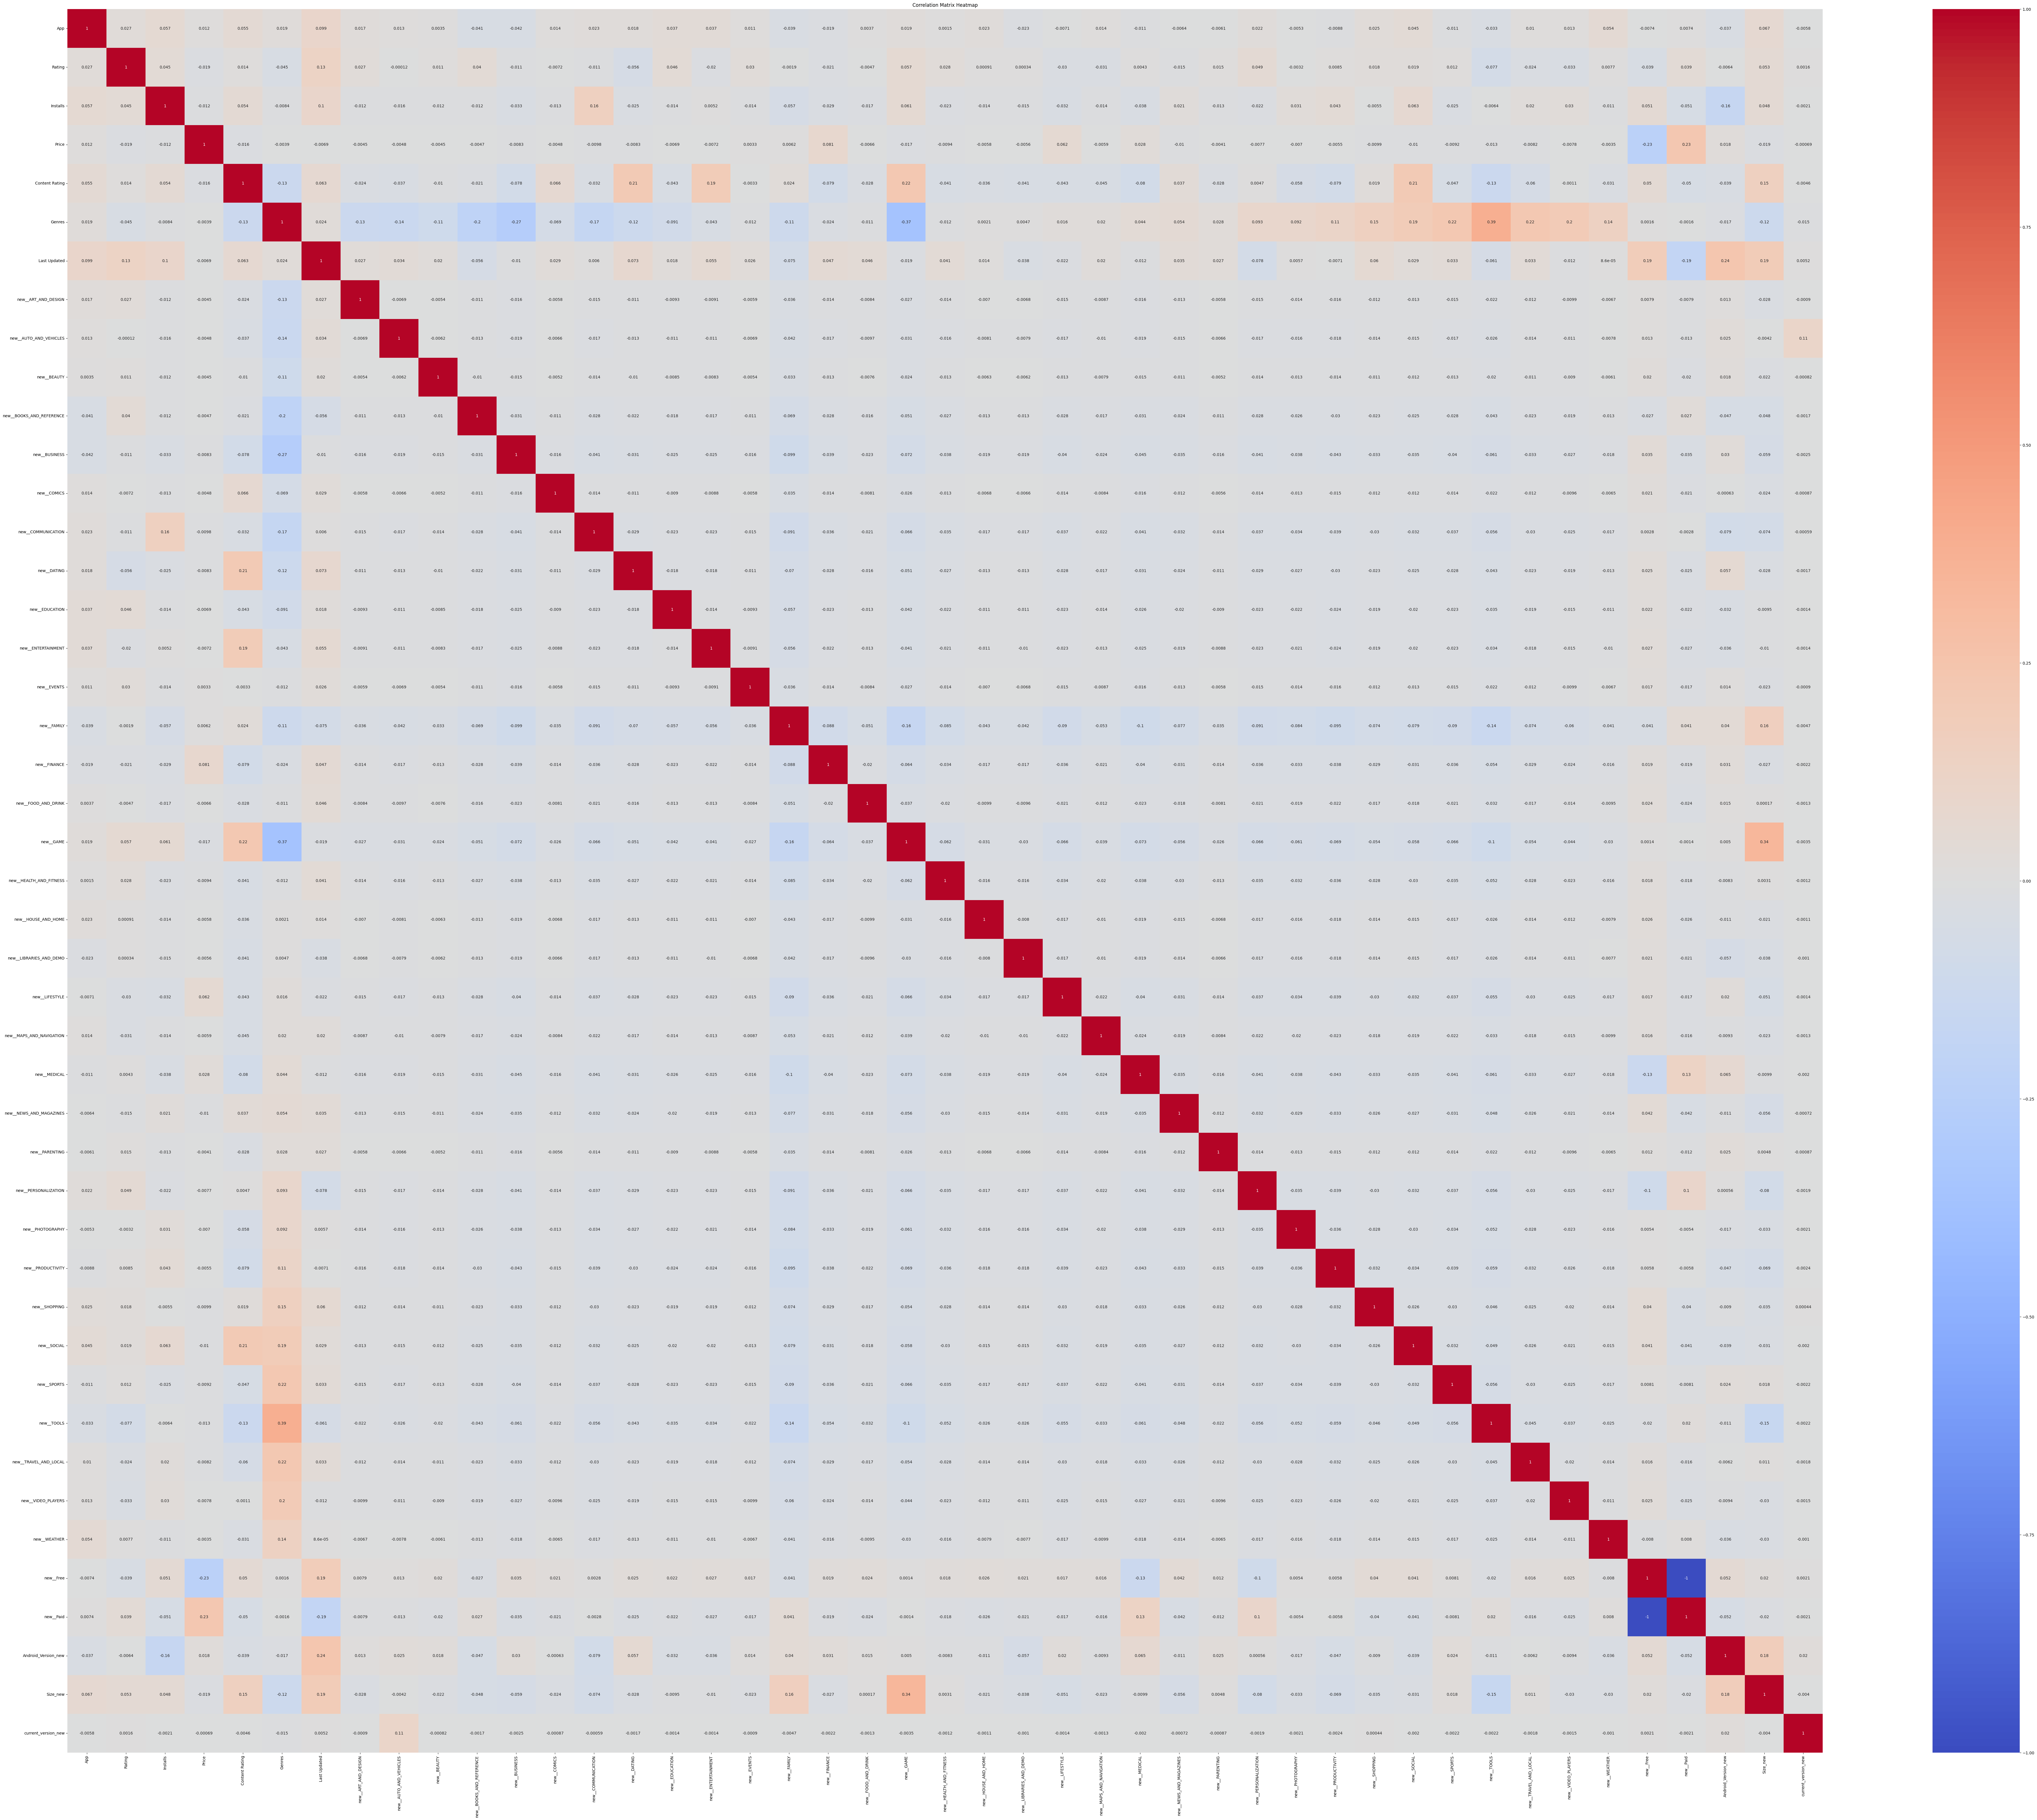

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(100, 80))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

Data cleanup and understanding complete, now to create a model that can rate an app based on its features

# MODEL

In [59]:
final_dataset.head()

,App,Rating,Reviews,Installs,Price,Content Rating,Genres,Last Updated,new__ART_AND_DESIGN,new__AUTO_AND_VEHICLES,...,new__SPORTS,new__TOOLS,new__TRAVEL_AND_LOCAL,new__VIDEO_PLAYERS,new__WEATHER,new__Free,new__Paid,Android_Version_new,Size_new,current_version_new
0,6955,4.1,159,10000.0,0.0,1,9,1515283200000000000,1,0,...,0,0,0,0,0,1,0,4.0,19.0,1.0
1,2630,3.9,967,500000.0,0.0,1,12,1515974400000000000,1,0,...,0,0,0,0,0,1,0,4.0,14.0,2.0
2,8648,4.7,87510,5000000.0,0.0,1,9,1533081600000000000,1,0,...,0,0,0,0,0,1,0,4.0,8.7,1.0
3,7819,4.5,215644,50000000.0,0.0,4,9,1528416000000000000,1,0,...,0,0,0,0,0,1,0,4.0,25.0,2.0
4,7014,4.3,967,100000.0,0.0,1,11,1529452800000000000,1,0,...,0,0,0,0,0,1,0,4.0,2.8,1.0


In [60]:
final_dataset.columns

Index(['App', 'Rating', 'Reviews', 'Installs', 'Price', 'Content Rating',
       'Genres', 'Last Updated', 'new__ART_AND_DESIGN',
       'new__AUTO_AND_VEHICLES', 'new__BEAUTY', 'new__BOOKS_AND_REFERENCE',
       'new__BUSINESS', 'new__COMICS', 'new__COMMUNICATION', 'new__DATING',
       'new__EDUCATION', 'new__ENTERTAINMENT', 'new__EVENTS', 'new__FAMILY',
       'new__FINANCE', 'new__FOOD_AND_DRINK', 'new__GAME',
       'new__HEALTH_AND_FITNESS', 'new__HOUSE_AND_HOME',
       'new__LIBRARIES_AND_DEMO', 'new__LIFESTYLE', 'new__MAPS_AND_NAVIGATION',
       'new__MEDICAL', 'new__NEWS_AND_MAGAZINES', 'new__PARENTING',
       'new__PERSONALIZATION', 'new__PHOTOGRAPHY', 'new__PRODUCTIVITY',
       'new__SHOPPING', 'new__SOCIAL', 'new__SPORTS', 'new__TOOLS',
       'new__TRAVEL_AND_LOCAL', 'new__VIDEO_PLAYERS', 'new__WEATHER',
       'new__Free', 'new__Paid', 'Android_Version_new', 'Size_new',
       'current_version_new'],
      dtype='object')

In [62]:
features=['App', 'Reviews', 'Size_new', 'Installs', 'Price',
       'Content Rating', 'Genres', 'Last Updated', 'new__ART_AND_DESIGN',
       'new__AUTO_AND_VEHICLES', 'new__BEAUTY', 'new__BOOKS_AND_REFERENCE',
       'new__BUSINESS', 'new__COMICS', 'new__COMMUNICATION', 'new__DATING',
       'new__EDUCATION', 'new__ENTERTAINMENT', 'new__EVENTS', 'new__FAMILY',
       'new__FINANCE', 'new__FOOD_AND_DRINK', 'new__GAME',
       'new__HEALTH_AND_FITNESS', 'new__HOUSE_AND_HOME',
       'new__LIBRARIES_AND_DEMO', 'new__LIFESTYLE', 'new__MAPS_AND_NAVIGATION',
       'new__MEDICAL', 'new__NEWS_AND_MAGAZINES', 'new__PARENTING',
       'new__PERSONALIZATION', 'new__PHOTOGRAPHY', 'new__PRODUCTIVITY',
       'new__SHOPPING', 'new__SOCIAL', 'new__SPORTS', 'new__TOOLS',
       'new__TRAVEL_AND_LOCAL', 'new__VIDEO_PLAYERS', 'new__WEATHER',
       'new__Free', 'new__Paid', 'Android_Version_new', 'current_version_new']
x = final_dataset[features]
y = final_dataset['Rating']

X being the input

Y being the output

In [63]:
#approach 1

In [64]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [66]:
print(model.feature_importances_)

[0.13153039 0.11908493 0.12923921 0.09184023 0.00996976 0.02383429
 0.03058338 0.15107666 0.00127072 0.00254767 0.00083216 0.00419431
 0.00764871 0.00251989 0.00501049 0.00512464 0.00203107 0.00220002
 0.0015733  0.01444007 0.00876223 0.00375137 0.00657246 0.00894334
 0.00161129 0.00156555 0.0081979  0.00419398 0.01009771 0.00589981
 0.00344202 0.0038859  0.00514562 0.00686335 0.00394396 0.0047101
 0.00561806 0.00629245 0.00398937 0.00449148 0.0011471  0.00462306
 0.00376509 0.05948621 0.08644868]


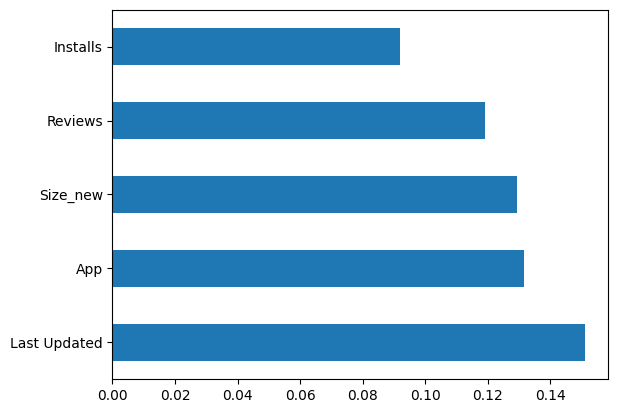

In [67]:
feat_importances=pd.Series(model.feature_importances_,index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2)

In [69]:
X_train.shape

(8663, 45)

In [70]:
from sklearn.ensemble import RandomForestRegressor
rf_random=RandomForestRegressor()

In [72]:
###Hyperparamters
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=15)]
print(n_estimators)

[100, 178, 257, 335, 414, 492, 571, 650, 728, 807, 885, 964, 1042, 1121, 1200]


In [73]:
from sklearn.model_selection import RandomizedSearchCV

In [76]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1400, num = 15)]
# Number of features to consider at every split
max_features = ['sqrt', 'log2', None, 0.5]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [77]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [50, 146, 242, 339, 435, 532, 628, 725, 821, 917, 1014, 1110, 1207, 1303, 1400], 'max_features': ['sqrt', 'log2', None, 0.5], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [78]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 8, cv = 5, verbose=2, random_state=42, n_jobs = 1)


# Training

In [79]:
rf_random.fit(X_train,Y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END max_depth=5, max_features=None, min_samples_leaf=10, min_samples_split=10, n_estimators=532; total time=  10.5s
[CV] END max_depth=5, max_features=None, min_samples_leaf=10, min_samples_split=10, n_estimators=532; total time=   8.0s
[CV] END max_depth=5, max_features=None, min_samples_leaf=10, min_samples_split=10, n_estimators=532; total time=   7.2s
[CV] END max_depth=5, max_features=None, min_samples_leaf=10, min_samples_split=10, n_estimators=532; total time=   7.9s
[CV] END max_depth=5, max_features=None, min_samples_leaf=10, min_samples_split=10, n_estimators=532; total time=   7.9s
[CV] END max_depth=25, max_features=log2, min_samples_leaf=10, min_samples_split=100, n_estimators=532; total time=   2.8s
[CV] END max_depth=25, max_features=log2, min_samples_leaf=10, min_samples_split=100, n_estimators=532; total time=   2.6s
[CV] END max_depth=25, max_features=log2, min_samples_leaf=10, min_samples_split=100, n_e

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=8, n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['sqrt', 'log2', None,
                                                         0.5],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [50, 146, 242, 339, 435,
                                                         532, 628, 725, 821,
                                                         917, 1014, 1110, 1207,
                                                         1303, 1400]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [80]:
rf_random.best_params_

{'n_estimators': 435,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 0.5,
 'max_depth': 25}

# Testing

In [81]:
predictions=rf_random.predict(X_test)

In [82]:
predictions

array([3.86083313, 4.35681784, 4.13912061, ..., 4.13368041, 4.60142278,
       4.45014566])

In [83]:
Y_test

3692    3.8
2905    4.3
7917    3.5
3196    4.1
4372    4.0
       ... 
1123    4.4
7036    4.4
5848    4.6
1797    4.8
3683    4.7
Name: Rating, Length: 2166, dtype: float64

In [84]:
Y_test.values

array([3.8, 4.3, 3.5, ..., 4.6, 4.8, 4.7])

In [85]:
Y_test.values-predictions

array([-0.06083313, -0.05681784, -0.63912061, ...,  0.46631959,
        0.19857722,  0.24985434])

In [86]:
len(Y_test)

2166

I personally think i shoukd have seggregated apps rating into categories like 1 star 2 star ... 5 star based on approximation and then did a classification

In [100]:
count=0
for i in range(len(Y_test)):
  if abs(Y_test.values[i]-predictions[i]) < 1:
    count=count+1
print("correctly predicted",count,"/",len(Y_test))
print("Accuracy = ",(count/len(Y_test))*100,'%')

correctly predicted 2096 / 2166
Accuracy =  96.76823638042474 %


In [101]:
count=0
for i in range(len(Y_test)):
  if abs(Y_test.values[i]-predictions[i]) < 0.5:
    count=count+1
print("correctly predicted",count,"/",len(Y_test))
print("Accuracy = ",(count/len(Y_test))*100,'%')

correctly predicted 1827 / 2166
Accuracy =  84.34903047091413 %


In [102]:
count=0
for i in range(len(Y_test)):
  if abs(Y_test.values[i]-predictions[i]) < 0.25:
    count=count+1
print("correctly predicted",count,"/",len(Y_test))
print("Accuracy = ",(count/len(Y_test))*100,'%')

correctly predicted 1346 / 2166
Accuracy =  62.14219759926131 %


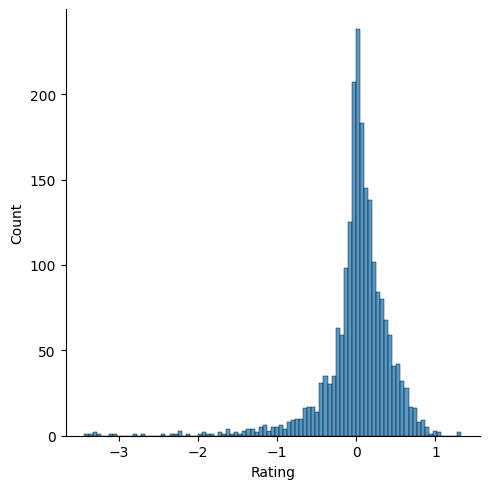

In [103]:
sns.displot(Y_test-predictions)

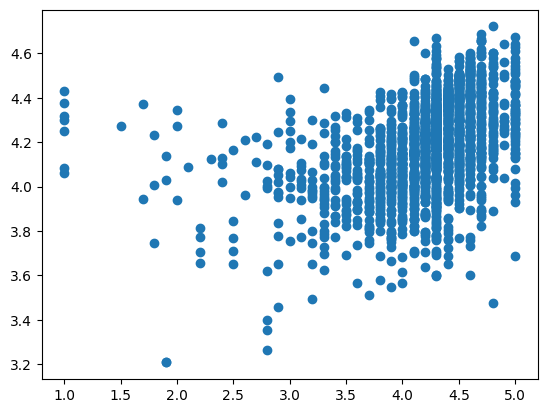

In [104]:
plt.scatter(Y_test,predictions)

In [105]:
from sklearn import metrics

In [106]:
print('MAE:', metrics.mean_absolute_error( Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

MAE: 0.2781173082959874
MSE: 0.20090192274191448
RMSE: 0.4482208414854384
